In [1]:
import pandas as pd
import numpy as np

In [3]:
file_path = r"C:\Users\npdan\IH_LABS/Project3/enhanced_anxiety_dataset.csv"
df = pd.read_csv(file_path)
df.head()

,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Anxiety Level (1-10)
0,29,Female,Artist,6.0,2.7,181,10,Yes,No,10,114,14,4,No,Yes,3,Yes,7,5.0
1,46,Other,Nurse,6.2,5.7,200,8,Yes,Yes,1,62,23,2,Yes,No,2,No,8,3.0
2,64,Male,Other,5.0,3.7,117,4,No,Yes,1,91,28,3,No,No,1,Yes,1,1.0
3,20,Female,Scientist,5.8,2.8,360,6,Yes,No,4,86,17,3,No,No,0,No,1,2.0
4,49,Female,Other,8.2,2.3,247,4,Yes,No,1,98,19,4,Yes,Yes,1,No,3,1.0


In [5]:
df.shape

(11000, 19)

In [7]:
df.dtypes

Age                                    int64
Gender                                object
Occupation                            object
Sleep Hours                          float64
Physical Activity (hrs/week)         float64
Caffeine Intake (mg/day)               int64
Alcohol Consumption (drinks/week)      int64
Smoking                               object
Family History of Anxiety             object
Stress Level (1-10)                    int64
Heart Rate (bpm)                       int64
Breathing Rate (breaths/min)           int64
Sweating Level (1-5)                   int64
Dizziness                             object
Medication                            object
Therapy Sessions (per month)           int64
Recent Major Life Event               object
Diet Quality (1-10)                    int64
Anxiety Level (1-10)                 float64
dtype: object

In [9]:
df.nunique()

Age                                   47
Gender                                 3
Occupation                            13
Sleep Hours                           82
Physical Activity (hrs/week)         100
Caffeine Intake (mg/day)             600
Alcohol Consumption (drinks/week)     20
Smoking                                2
Family History of Anxiety              2
Stress Level (1-10)                   10
Heart Rate (bpm)                      60
Breathing Rate (breaths/min)          18
Sweating Level (1-5)                   5
Dizziness                              2
Medication                             2
Therapy Sessions (per month)          13
Recent Major Life Event                2
Diet Quality (1-10)                   10
Anxiety Level (1-10)                  10
dtype: int64

In [11]:
df.isnull().sum()

Age                                  0
Gender                               0
Occupation                           0
Sleep Hours                          0
Physical Activity (hrs/week)         0
Caffeine Intake (mg/day)             0
Alcohol Consumption (drinks/week)    0
Smoking                              0
Family History of Anxiety            0
Stress Level (1-10)                  0
Heart Rate (bpm)                     0
Breathing Rate (breaths/min)         0
Sweating Level (1-5)                 0
Dizziness                            0
Medication                           0
Therapy Sessions (per month)         0
Recent Major Life Event              0
Diet Quality (1-10)                  0
Anxiety Level (1-10)                 0
dtype: int64

In [15]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.stats import uniform, randint
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from scipy.stats import uniform, randint
from sklearn.metrics import make_scorer
import xgboost as xgb

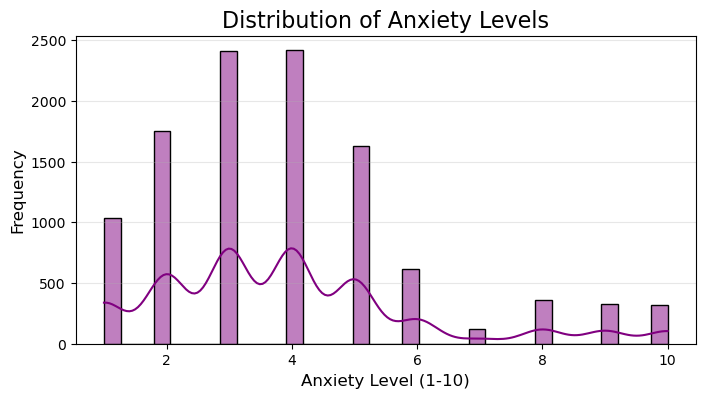

In [33]:
#Exploring Anxiety Level

plt.figure(figsize=(8,4))
ax = sns.histplot(df['Anxiety Level (1-10)'], kde=True, color='purple')
plt.title("Distribution of Anxiety Levels", fontsize=16)
plt.xlabel("Anxiety Level (1-10)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', alpha=0.3)

In [37]:
#Get dummies 

df_dum = pd.get_dummies(df, columns = ['Gender', 'Occupation'])

df_dum

,Age,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),...,Occupation_Doctor,Occupation_Engineer,Occupation_Freelancer,Occupation_Lawyer,Occupation_Musician,Occupation_Nurse,Occupation_Other,Occupation_Scientist,Occupation_Student,Occupation_Teacher
0,29,6.0,2.7,181,10,Yes,No,10,114,14,...,False,False,False,False,False,False,False,False,False,False
1,46,6.2,5.7,200,8,Yes,Yes,1,62,23,...,False,False,False,False,False,True,False,False,False,False
2,64,5.0,3.7,117,4,No,Yes,1,91,28,...,False,False,False,False,False,False,True,False,False,False
3,20,5.8,2.8,360,6,Yes,No,4,86,17,...,False,False,False,False,False,False,False,True,False,False
4,49,8.2,2.3,247,4,Yes,No,1,98,19,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10995,23,6.1,3.1,566,9,Yes,No,8,91,28,...,False,True,False,False,False,False,False,False,False,False
10996,50,6.6,3.6,64,17,Yes,No,7,95,17,...,False,False,False,False,False,False,False,False,False,True
10997,29,6.7,6.9,159,14,No,No,8,72,16,...,False,False,False,False,False,True,False,False,False,False
10998,53,5.7,2.7,248,8,No,No,4,112,28,...,False,False,False,False,False,False,False,False,False,False


In [39]:
for column in df_dum.columns:
    if column == 'Anxiety Level (1-10)':
        df_dum[column] = df_dum[column].astype(int)

df_dum

,Age,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),...,Occupation_Doctor,Occupation_Engineer,Occupation_Freelancer,Occupation_Lawyer,Occupation_Musician,Occupation_Nurse,Occupation_Other,Occupation_Scientist,Occupation_Student,Occupation_Teacher
0,29,6.0,2.7,181,10,Yes,No,10,114,14,...,False,False,False,False,False,False,False,False,False,False
1,46,6.2,5.7,200,8,Yes,Yes,1,62,23,...,False,False,False,False,False,True,False,False,False,False
2,64,5.0,3.7,117,4,No,Yes,1,91,28,...,False,False,False,False,False,False,True,False,False,False
3,20,5.8,2.8,360,6,Yes,No,4,86,17,...,False,False,False,False,False,False,False,True,False,False
4,49,8.2,2.3,247,4,Yes,No,1,98,19,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10995,23,6.1,3.1,566,9,Yes,No,8,91,28,...,False,True,False,False,False,False,False,False,False,False
10996,50,6.6,3.6,64,17,Yes,No,7,95,17,...,False,False,False,False,False,False,False,False,False,True
10997,29,6.7,6.9,159,14,No,No,8,72,16,...,False,False,False,False,False,True,False,False,False,False
10998,53,5.7,2.7,248,8,No,No,4,112,28,...,False,False,False,False,False,False,False,False,False,False


In [43]:
for column in df_dum.columns:
    if column == 'Anxiety Level (1-10)':
        df_dum[column] = df_dum[column]-1

df_dum

,Age,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),...,Occupation_Doctor,Occupation_Engineer,Occupation_Freelancer,Occupation_Lawyer,Occupation_Musician,Occupation_Nurse,Occupation_Other,Occupation_Scientist,Occupation_Student,Occupation_Teacher
0,29,6.0,2.7,181,10,Yes,No,10,114,14,...,False,False,False,False,False,False,False,False,False,False
1,46,6.2,5.7,200,8,Yes,Yes,1,62,23,...,False,False,False,False,False,True,False,False,False,False
2,64,5.0,3.7,117,4,No,Yes,1,91,28,...,False,False,False,False,False,False,True,False,False,False
3,20,5.8,2.8,360,6,Yes,No,4,86,17,...,False,False,False,False,False,False,False,True,False,False
4,49,8.2,2.3,247,4,Yes,No,1,98,19,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10995,23,6.1,3.1,566,9,Yes,No,8,91,28,...,False,True,False,False,False,False,False,False,False,False
10996,50,6.6,3.6,64,17,Yes,No,7,95,17,...,False,False,False,False,False,False,False,False,False,True
10997,29,6.7,6.9,159,14,No,No,8,72,16,...,False,False,False,False,False,True,False,False,False,False
10998,53,5.7,2.7,248,8,No,No,4,112,28,...,False,False,False,False,False,False,False,False,False,False


In [45]:
#Label Encoder

label_encoder = LabelEncoder()

for column in df_dum.columns:
    if df_dum[column].dtype == 'object':
        df_dum[column] = label_encoder.fit_transform(df_dum[column])

df_dum

,Age,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),...,Occupation_Doctor,Occupation_Engineer,Occupation_Freelancer,Occupation_Lawyer,Occupation_Musician,Occupation_Nurse,Occupation_Other,Occupation_Scientist,Occupation_Student,Occupation_Teacher
0,29,6.0,2.7,181,10,1,0,10,114,14,...,False,False,False,False,False,False,False,False,False,False
1,46,6.2,5.7,200,8,1,1,1,62,23,...,False,False,False,False,False,True,False,False,False,False
2,64,5.0,3.7,117,4,0,1,1,91,28,...,False,False,False,False,False,False,True,False,False,False
3,20,5.8,2.8,360,6,1,0,4,86,17,...,False,False,False,False,False,False,False,True,False,False
4,49,8.2,2.3,247,4,1,0,1,98,19,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10995,23,6.1,3.1,566,9,1,0,8,91,28,...,False,True,False,False,False,False,False,False,False,False
10996,50,6.6,3.6,64,17,1,0,7,95,17,...,False,False,False,False,False,False,False,False,False,True
10997,29,6.7,6.9,159,14,0,0,8,72,16,...,False,False,False,False,False,True,False,False,False,False
10998,53,5.7,2.7,248,8,0,0,4,112,28,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
for column in df_dum.columns:
    if df_dum[column].dtype == 'bool':
        df_dum[column] = df_dum[column].astype(int)


In [55]:
#1. FEATURE SELECTION

target = "Anxiety Level (1-10)"

X = df_dum.drop(target, axis=1)
y = df_dum[target]

In [57]:
#2. TRAIN/TEST SPLIT

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
#AUTOMATIC HYPERMPARAMETER SELECTION WITH XGBOOST CLASSIFIER

model_class = xgb.XGBClassifier(
    objective="multi:softmax",
    num_class=10, 
    random_state=42,
    n_jobs=-1
)

params = {
    "colsample_bytree": uniform(0.6, 0.4),  
    "gamma": uniform(0, 0.5),              
    "learning_rate": uniform(0.03, 0.3),    
    "max_depth": randint(2, 6),             
    "n_estimators": randint(100, 150),      
    "subsample": uniform(0.6, 0.4),         
    "reg_alpha": uniform(0, 1),           
    "reg_lambda": uniform(0, 1)            
}

In [63]:
search = RandomizedSearchCV(
    model_class,
    param_distributions=params,
    n_iter=200,              
    cv=3,                     
    scoring="accuracy",       
    verbose=1,
    random_state=42,
    n_jobs=-1                
)

search.fit(X_train, y_train)

print("Best parameters:", search.best_params_)
print("Best accuracy:", search.best_score_)

Fitting 3 folds for each of 200 candidates, totalling 600 fits
Best parameters: {'colsample_bytree': 0.6851856646035643, 'gamma': 0.06818573779338488, 'learning_rate': 0.034363399700364575, 'max_depth': 3, 'n_estimators': 149, 'reg_alpha': 0.5899176868546331, 'reg_lambda': 0.3922440450997323, 'subsample': 0.7749899688094917}
Best accuracy: 0.3656830155065802


In [65]:
best_params = {
    'colsample_bytree': 0.6851856646035643, 
    'gamma': 0.06818573779338488, 
    'learning_rate': 0.034363399700364575, 
    'max_depth': 3, 
    'n_estimators': 149, 
    'reg_alpha': 0.5899176868546331, 
    'reg_lambda': 0.3922440450997323, 
    'subsample': 0.7749899688094917
}

final_model_class = xgb.XGBClassifier(
    objective="multi:softmax",
    **best_params,  
    random_state=42,
    n_jobs=-1
)

final_model_class.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6851856646035643, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, feature_weights=None,
              gamma=0.06818573779338488, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.034363399700364575,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=149, n_jobs=-1,
              num_parallel_tree=None, ...)

In [67]:
y_pred_c = final_model_class.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_c)

print("Accuracy:", accuracy)

Accuracy: 0.3377272727272727


In [69]:
#AUTOMATIC HYPERMPARAMETER SELECTION WITH XGBOOST REGRESSOR

from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer
import xgboost as xgb


model_reg = xgb.XGBRegressor(
    objective="reg:squaredlogerror",  
    random_state=42,
    n_jobs=-1
)

params = {
    "colsample_bytree": uniform(0.6, 0.4), 
    "gamma": uniform(0, 0.5),               
    "learning_rate": uniform(0.03, 0.3),    
    "max_depth": randint(2, 6),             
    "n_estimators": randint(100, 150),     
    "subsample": uniform(0.6, 0.4),         
    "reg_alpha": uniform(0, 1),             
    "reg_lambda": uniform(0, 1)            
}

search = RandomizedSearchCV(
    model_reg, 
    param_distributions=params,
    n_iter=200,
    cv=3,
    scoring="neg_mean_squared_error",  
    verbose=1,
    random_state=42,
    n_jobs=-1
)

search.fit(X_train, y_train)

print("Best parameters:", search.best_params_)
print("Best MSE:", -search.best_score_)  

Fitting 3 folds for each of 200 candidates, totalling 600 fits
Best parameters: {'colsample_bytree': 0.8389096289721364, 'gamma': 0.2625157504301341, 'learning_rate': 0.10807001038545819, 'max_depth': 4, 'n_estimators': 149, 'reg_alpha': 0.49118634086862656, 'reg_lambda': 0.9963357758067243, 'subsample': 0.9589744592184816}
Best MSE: 1.0989307758620865


In [71]:
best_params = {
    'colsample_bytree': 0.8389096289721364,
    'gamma': 0.2625157504301341,
    'learning_rate': 0.10807001038545819,
    'max_depth': 4, 
    'n_estimators': 149,
    'reg_alpha': 0.49118634086862656, 
    'reg_lambda': 0.9963357758067243, 
    'subsample': 0.9589744592184816
}

final_model_reg = xgb.XGBRegressor(
    objective="reg:squaredlogerror",
    **best_params,  
    random_state=42,
    n_jobs=-1
)

final_model_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8389096289721364, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, feature_weights=None,
             gamma=0.2625157504301341, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.10807001038545819,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=149, n_jobs=-1,
             num_parallel_tree=None, ...)

In [73]:
#Make predictions

y_pred_reg = final_model_reg.predict(X_test)
y_pred_reg

array([3.9624693, 3.6809523, 7.545629 , ..., 2.462162 , 2.489557 ,
       2.5337756], dtype=float32)

In [75]:
#Round predictions

y_pred_round = np.round(y_pred_reg).astype(int)
y_pred_round

array([4, 4, 8, ..., 2, 2, 3])

In [77]:
#Evaluate model

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score

mse = mean_squared_error(y_test, y_pred_round)
mae = mean_absolute_error(y_test, y_pred_round)
r2 = r2_score(y_test, y_pred_round)
accuracy = accuracy_score(y_test, y_pred_round)

print("MSE:", mse)
print("MAE:", mae)
print("R²:", r2)
print("Accuracy:", accuracy)

MSE: 1.1322727272727273
MAE: 0.7940909090909091
R²: 0.7556427956226343
Accuracy: 0.35954545454545456


In [81]:
df_pred={
    'Prediction': y_pred_reg,
    'Actual': y_test,
    'Pred round': y_pred_round
}

df_check = pd.DataFrame(df_pred)
df_check.head(20)

,Prediction,Actual,Pred round
107,3.962469,4,4
5484,3.680952,4,4
6998,7.545629,9,8
3984,0.425379,0,0
3111,1.249924,0,1
4040,0.405308,2,0
3013,3.891951,3,4
6607,2.133313,4,2
4219,1.809300,3,2
8750,2.905086,3,3


In [83]:
df_check.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2200 entries, 107 to 7571
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Prediction  2200 non-null   float32
 1   Actual      2200 non-null   int32  
 2   Pred round  2200 non-null   int32  
dtypes: float32(1), int32(2)
memory usage: 43.0 KB


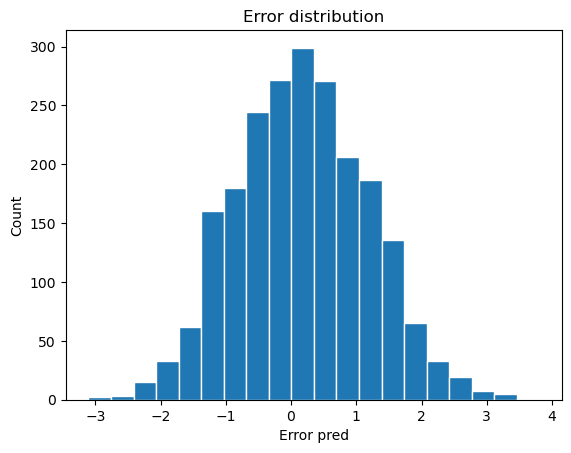

In [91]:
errors = df_check['Actual'] - df_check['Prediction']
plt.hist(errors, bins=20, edgecolor='white')
plt.xlabel("Error pred")
plt.ylabel("Count")
plt.title("Error distribution")
plt.show()

In [93]:
#1. Preparing the dataset : import librairies

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings


In [95]:
#2. Initialize models

models = {
    "Random Forest": RandomForestRegressor(random_state=42),
    "Ridge Regression": Ridge(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Lasso Regression": Lasso(random_state=42),
    "ElasticNet": ElasticNet(random_state=42)
}

#Results dictionary to store evaluation metrics
results = {}


In [103]:
#3. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#4. Train the model
model.fit(X_train, y_train)
    
#5. Make predictions
y_pred = model.predict(X_test)
    
#6. Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
    
#7. Store results
results[name] = {
        'MAE': mae,
        'RMSE': rmse,
        'R²': r2,
        'Predictions': y_pred
}

In [105]:
# Print metrics

print(f"{name} - MAE: {mae:.3f}, RMSE: {rmse:.3f}, R²: {r2:.3f}")


Random Forest - MAE: 0.819, RMSE: 1.018, R²: 0.776


In [109]:
# Cross-validation for best model (Random Forest)

rf_model = RandomForestRegressor(random_state=42)
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='r2')

print(f"Cross-validation R² scores: {cv_scores}")
print(f"Mean R² score: {np.mean(cv_scores):.3f}")

Cross-validation R² scores: [0.7551333  0.7304507  0.76903065 0.76733701 0.7753696 ]
Mean R² score: 0.759


In [173]:
#Random Forest

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluation
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - MSE: {mse_rf:.2f}, R2: {r2_rf:.2f}")

Random Forest - MSE: 1.04, R2: 0.78


In [159]:
#Linear Regression

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression - MSE: {mse_lr:.2f}, R2: {r2_lr:.2f}")


Linear Regression - MSE: 1.27, R2: 0.73
Accuracy: 0.35954545454545456


In [161]:
#Gradient Boosting

from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)

mse_gbr = mean_squared_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

print(f"Gradient Boosting - MSE: {mse_gbr:.2f}, R2: {r2_gbr:.2f}")


Gradient Boosting - MSE: 1.04, R2: 0.78
Accuracy: 0.35954545454545456


In [163]:
#LightGBM Regressor

from lightgbm import LGBMRegressor

lgbm = LGBMRegressor(random_state=42)
lgbm.fit(X_train, y_train)
y_pred_lgbm = lgbm.predict(X_test)

mse_lgbm = mean_squared_error(y_test, y_pred_lgbm)
r2_lgbm = r2_score(y_test, y_pred_lgbm)

print(f"LightGBM - MSE: {mse_lgbm:.2f}, R2: {r2_lgbm:.2f}")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001044 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 653
[LightGBM] [Info] Number of data points in the train set: 8800, number of used features: 32
[LightGBM] [Info] Start training from score 2.924659
LightGBM - MSE: 1.02, R2: 0.78
Accuracy: 0.35954545454545456


In [129]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [131]:
normalizer = MinMaxScaler()

normalizer.fit(X_train)

MinMaxScaler()

In [135]:
X_train_norm = normalizer.transform(X_train)

X_test_norm = normalizer.transform(X_test)

In [137]:
X_train_norm = pd.DataFrame(X_train_norm, columns = X_train.columns)
X_train_norm.head()

,Age,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),...,Occupation_Doctor,Occupation_Engineer,Occupation_Freelancer,Occupation_Lawyer,Occupation_Musician,Occupation_Nurse,Occupation_Other,Occupation_Scientist,Occupation_Student,Occupation_Teacher
0,0.478261,0.511111,0.039604,0.497496,0.105263,1.0,1.0,0.222222,0.237288,0.588235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.260870,0.333333,0.247525,0.702838,0.631579,1.0,1.0,0.777778,0.762712,0.529412,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.282609,0.288889,0.049505,0.889816,0.315789,0.0,1.0,1.000000,0.983051,0.764706,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.913043,0.388889,0.019802,0.362270,0.947368,1.0,1.0,0.666667,0.949153,0.647059,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.456522,0.277778,0.217822,0.181970,0.052632,1.0,1.0,0.888889,0.355932,0.705882,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [139]:
X_test_norm = pd.DataFrame(X_test_norm, columns = X_test.columns)
X_test_norm.head()

,Age,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),...,Occupation_Doctor,Occupation_Engineer,Occupation_Freelancer,Occupation_Lawyer,Occupation_Musician,Occupation_Nurse,Occupation_Other,Occupation_Scientist,Occupation_Student,Occupation_Teacher
0,0.369565,0.600000,0.455446,0.936561,0.421053,0.0,0.0,1.000000,0.457627,0.882353,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.521739,0.444444,0.534653,0.347245,0.894737,1.0,0.0,1.000000,0.372881,0.764706,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.608696,0.344444,0.019802,0.612688,0.473684,0.0,1.0,0.888889,0.559322,0.764706,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.108696,0.488889,0.108911,0.484140,0.157895,1.0,0.0,0.000000,0.237288,0.352941,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.173913,0.455556,0.376238,0.060100,0.210526,1.0,1.0,0.222222,0.932203,0.823529,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [141]:
bagging_reg = BaggingRegressor(DecisionTreeRegressor(max_depth=20),
                               n_estimators=100,
                               max_samples = 1000)

In [143]:
bagging_reg.fit(X_train_norm, y_train)

BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=20),
                 max_samples=1000, n_estimators=100)

In [165]:
pred = bagging_reg.predict(X_test_norm)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test, squared=False))
print("R2 score", bagging_reg.score(X_test_norm, y_test))
print("Accuracy:", accuracy)

MAE 0.8145994827331758
RMSE 1.0087247888778037
R2 score 0.7804064962697916
Accuracy: 0.35954545454545456


C:\Users\npdan\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [167]:
#AdaBoost

ada_reg = AdaBoostRegressor(DecisionTreeRegressor(max_depth=20),
                            n_estimators=100)

In [169]:
ada_reg.fit(X_train_norm, y_train)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=20),
                  n_estimators=100)

In [170]:
pred = ada_reg.predict(X_test_norm)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test, squared=False))
print("R2 score", ada_reg.score(X_test_norm, y_test))
print("Accuracy:", accuracy)

MAE 0.8034971768635939
RMSE 1.064413671180257
R2 score 0.7554909214430116
Accuracy: 0.35954545454545456


C:\Users\npdan\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [189]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred) ** 0.5  # OR use root_mean_squared_error
    return r2, rmse, mae

In [195]:
# 1️⃣ Predict and evaluate

# Predict
y_pred_rf = rf.predict(X_test)

# Evaluation metrics
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf) ** 0.5

# Print results
print("Random Forest Evaluation Metrics")
print(f"R² Score       : {r2_rf:.4f}")
print(f"RMSE           : {rmse_rf:.4f}")
print(f"MAE            : {mae_rf:.4f}")

Random Forest Evaluation Metrics
R² Score       : 0.7762
RMSE           : 1.0183
MAE            : 0.8190


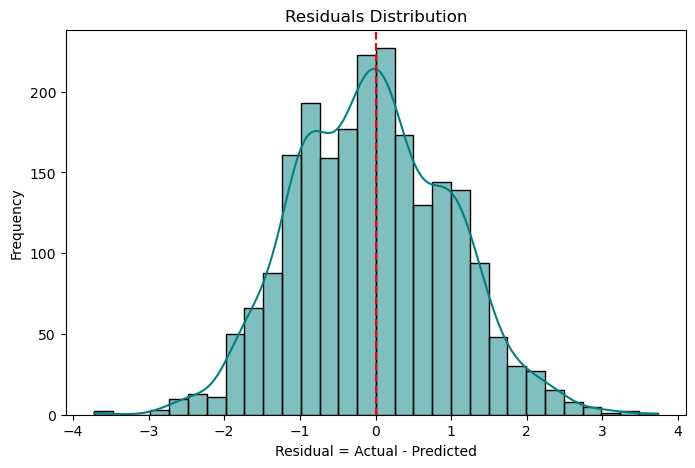

In [197]:
# 2️⃣ Plot residuals
residuals = y_test - y_pred_rf

plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, bins=30, color="teal")
plt.title("Residuals Distribution")
plt.xlabel("Residual = Actual - Predicted")
plt.ylabel("Frequency")
plt.axvline(0, color="red", linestyle="--")
plt.show()

In [201]:
# 3️⃣ Bin predicted values into anxiety categories

bins = [0, 1, 2, 3]
labels = ["Low", "Moderate", "High"]
anxiety_class = pd.cut(y_pred_rf, bins=bins, labels=labels)

# Count of predictions per class
class_counts = anxiety_class.value_counts().sort_index()
print("\nPredicted Anxiety Class Distribution:")
print(class_counts)

# Optional: Add to DataFrame for later analysis
X_test_copy = X_test.copy()
X_test_copy["Anxiety_Pred"] = y_pred_rf
X_test_copy["Anxiety_Class"] = anxiety_class



Predicted Anxiety Class Distribution:
Low         186
Moderate    572
High        586
Name: count, dtype: int64


C:\Users\npdan\AppData\Local\Temp\ipykernel_1976\2010207364.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_imp.values, y=feat_imp.index, palette="viridis")


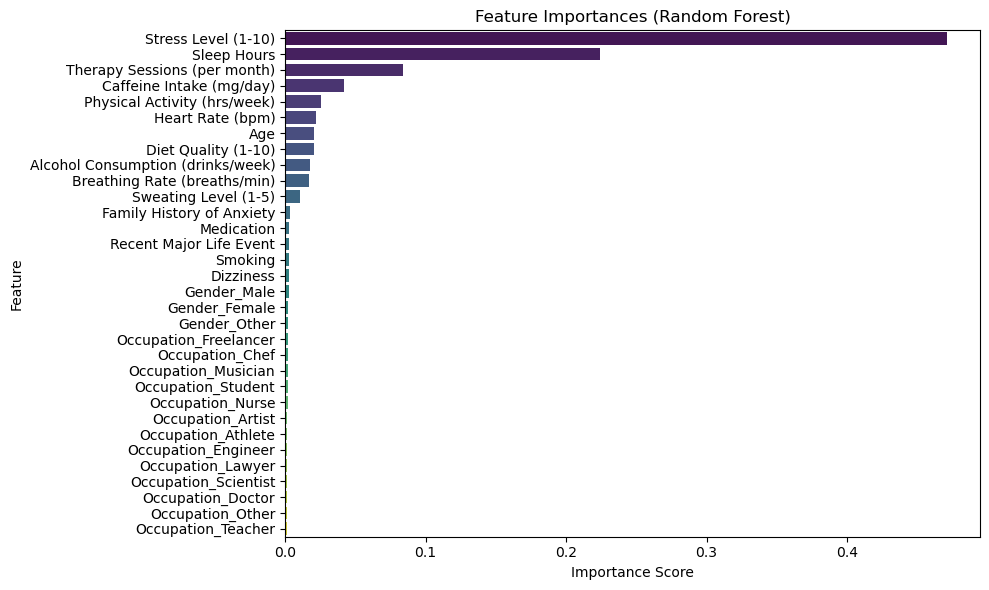

In [207]:
# 4️⃣ Visualize feature importance

from sklearn.ensemble import RandomForestRegressor

importances = rf.feature_importances_
feature_names = X_test.columns
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feat_imp.values, y=feat_imp.index, palette="viridis")
plt.title("Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [211]:
# Extract top 10 features by importance

# Get feature importances from fitted model
importances = rf.feature_importances_
feature_names = X_train.columns

# Create a DataFrame and sort
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Get top 10 features
top_features = importance_df['Feature'].head(10).tolist()
print("Top 10 features:", top_features)

Top 10 features: ['Stress Level (1-10)', 'Sleep Hours', 'Therapy Sessions (per month)', 'Caffeine Intake (mg/day)', 'Physical Activity (hrs/week)', 'Heart Rate (bpm)', 'Age', 'Diet Quality (1-10)', 'Alcohol Consumption (drinks/week)', 'Breathing Rate (breaths/min)']


In [215]:
# Keep only top 10 features in X_train and X_test

X_train_top = X_train[top_features].copy()
X_test_top = X_test[top_features].copy()

In [217]:
# Retrain
rf_top = RandomForestRegressor(random_state=42)
rf_top.fit(X_train_top, y_train)

# Predict
y_pred_top = rf_top.predict(X_test_top)

# Evaluate
from sklearn.metrics import r2_score, mean_squared_error
print("R² score:", r2_score(y_test, y_pred_top))
print("RMSE:", mean_squared_error(y_test, y_pred_top, squared=False))

R² score: 0.771308878350403
RMSE: 1.029408148580356


C:\Users\npdan\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [219]:
X_test_top_copy = X_test_top.copy()
X_test_top_copy["Anxiety_Pred"] = y_pred_top
X_test_top_copy["Anxiety_Class"] = pd.cut(
    y_pred_top,
    bins=[0, 1, 2, 3],
    labels=["Low", "Moderate", "High"]
)

C:\Users\npdan\AppData\Local\Temp\ipykernel_1976\799419155.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_imp.values, y=feat_imp.index, palette="viridis")


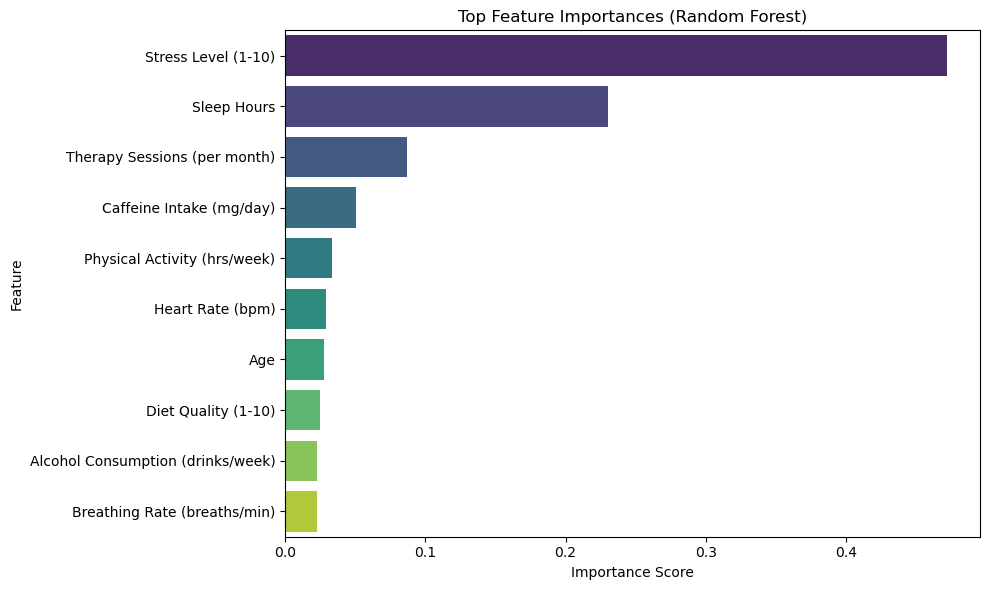

In [223]:
importances = rf_top.feature_importances_
feature_names = X_test_top.columns
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feat_imp.values, y=feat_imp.index, palette="viridis")
plt.title("Top Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [228]:
df_dum.head()

,Age,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),...,Occupation_Doctor,Occupation_Engineer,Occupation_Freelancer,Occupation_Lawyer,Occupation_Musician,Occupation_Nurse,Occupation_Other,Occupation_Scientist,Occupation_Student,Occupation_Teacher
0,29,6.0,2.7,181,10,1,0,10,114,14,...,0,0,0,0,0,0,0,0,0,0
1,46,6.2,5.7,200,8,1,1,1,62,23,...,0,0,0,0,0,1,0,0,0,0
2,64,5.0,3.7,117,4,0,1,1,91,28,...,0,0,0,0,0,0,1,0,0,0
3,20,5.8,2.8,360,6,1,0,4,86,17,...,0,0,0,0,0,0,0,1,0,0
4,49,8.2,2.3,247,4,1,0,1,98,19,...,0,0,0,0,0,0,1,0,0,0


In [232]:
#1. Add the predictions to my test set

X_test_copy = X_test.copy()
X_test_copy["Anxiety_Pred"] = y_pred
X_test_copy["Anxiety_Class"] = pd.cut(y_pred,
    bins=[0, 1, 2, 3],
    labels=["Low", "Moderate", "High"]
)

In [236]:
#2. Check feature means by class

X_test_copy.groupby("Anxiety_Class")[X_test.columns].mean().T.sort_values("High", ascending=False).head(10)

C:\Users\npdan\AppData\Local\Temp\ipykernel_1976\3173241148.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  X_test_copy.groupby("Anxiety_Class")[X_test.columns].mean().T.sort_values("High", ascending=False).head(10)


Anxiety_Class,Low,Moderate,High
Caffeine Intake (mg/day),202.693548,262.687063,262.143345
Heart Rate (bpm),88.231183,89.096154,89.240614
Age,39.145161,40.968531,40.547782
Breathing Rate (breaths/min),21.204301,20.381119,20.372014
Alcohol Consumption (drinks/week),9.553763,9.026224,9.112628
Sleep Hours,7.444624,6.974825,6.858703
Stress Level (1-10),1.505376,3.082168,5.834471
Diet Quality (1-10),5.930108,5.297203,5.409556
Physical Activity (hrs/week),2.830645,3.331818,3.103413
Sweating Level (1-5),2.989247,3.055944,3.083618


In [306]:
#Predict with LGBM Regressor

# 1️⃣ Predict and evaluate

# Predict
y_pred_lgbm = lgbm.predict(X_test)

# Evaluation metrics
r2_lgbm = r2_score(y_test, y_pred_lgbm)
mae_lgbm = mean_absolute_error(y_test, y_pred_lgbm)
rmse_lgbm = mean_squared_error(y_test, y_pred_lgbm) ** 0.5

# Print results
print("LGBM Regressor Metrics")
print(f"R² Score       : {r2_lgbm:.4f}")
print(f"RMSE           : {rmse_lgbm:.4f}")
print(f"MAE            : {mae_lgbm:.4f}")

LGBM Regressor Metrics
R² Score       : 0.7791
RMSE           : 1.0118
MAE            : 0.8172


In [308]:
# Extract top 10 features by importance

# Get feature importances from fitted model
importances = lgbm.feature_importances_
feature_names = X_train.columns

# Create a DataFrame and sort
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Get top 10 features
top_features = importance_df['Feature'].head(10).tolist()
print("Top 10 features:", top_features)


Top 10 features: ['Caffeine Intake (mg/day)', 'Sleep Hours', 'Physical Activity (hrs/week)', 'Heart Rate (bpm)', 'Stress Level (1-10)', 'Age', 'Therapy Sessions (per month)', 'Breathing Rate (breaths/min)', 'Alcohol Consumption (drinks/week)', 'Diet Quality (1-10)']


In [310]:
# Keep only top 10 features in X_train and X_test

X_train_top = X_train[top_features].copy()
X_test_top = X_test[top_features].copy()

In [312]:
# Retrain
lgbm_top = LGBMRegressor(random_state=42)
lgbm_top.fit(X_train_top, y_train)

# Predict
y_pred_top = lgbm_top.predict(X_test_top)

# Evaluate
from sklearn.metrics import r2_score, mean_squared_error
print("R² score:", r2_score(y_test, y_pred_top))
print("RMSE:", mean_squared_error(y_test, y_pred_top, squared=False))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000601 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 605
[LightGBM] [Info] Number of data points in the train set: 8800, number of used features: 10
[LightGBM] [Info] Start training from score 2.924659
R² score: 0.7787915453322924
RMSE: 1.0124272137562458


C:\Users\npdan\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [314]:
X_test_top_copy = X_test_top.copy()
X_test_top_copy["Anxiety_Pred"] = y_pred_top
X_test_top_copy["Anxiety_Class"] = pd.cut(
    y_pred_top,
    bins=[0, 1, 2, 3],
    labels=["Low", "Moderate", "High"]
)

C:\Users\npdan\AppData\Local\Temp\ipykernel_1976\1471167743.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_imp.values, y=feat_imp.index, palette="viridis")


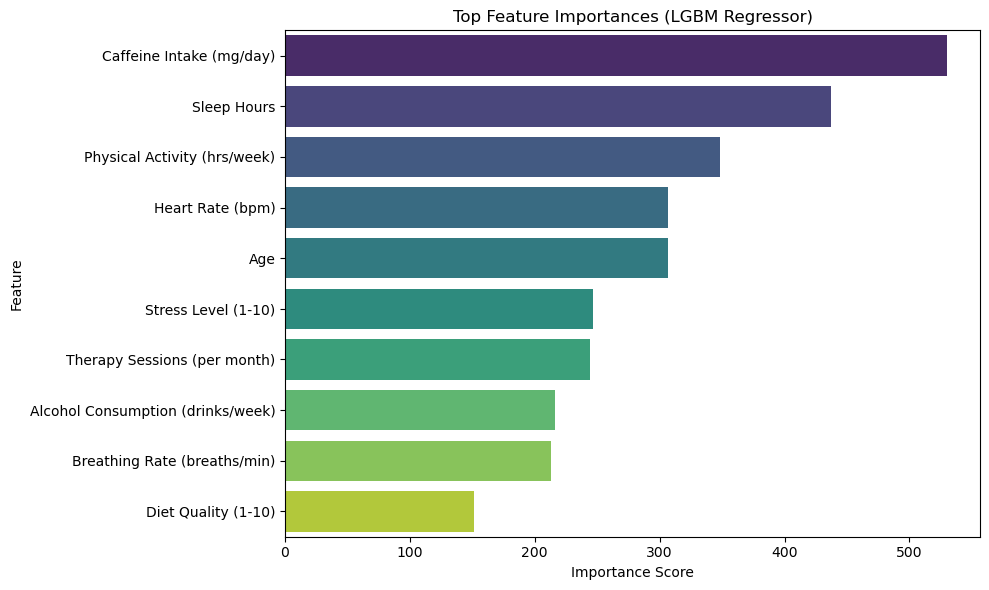

In [316]:
importances = lgbm_top.feature_importances_
feature_names = X_test_top.columns
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feat_imp.values, y=feat_imp.index, palette="viridis")
plt.title("Top Feature Importances (LGBM Regressor)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [318]:
#1. Add the predictions to my test set

X_test_copy = X_test.copy()
X_test_copy["Anxiety_Pred"] = y_pred
X_test_copy["Anxiety_Class"] = pd.cut(y_pred,
    bins=[0, 1, 2, 3],
    labels=["Low", "Moderate", "High"]
)

In [320]:
#2. Check feature means by class

X_test_copy.groupby("Anxiety_Class")[X_test.columns].mean().T.sort_values("High", ascending=False).head(10)

C:\Users\npdan\AppData\Local\Temp\ipykernel_1976\3173241148.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  X_test_copy.groupby("Anxiety_Class")[X_test.columns].mean().T.sort_values("High", ascending=False).head(10)


Anxiety_Class,Low,Moderate,High
Caffeine Intake (mg/day),212.995025,259.420664,264.901173
Heart Rate (bpm),88.985075,88.896679,88.760469
Age,37.905473,41.077491,40.964824
Breathing Rate (breaths/min),21.179104,20.518450,20.144054
Alcohol Consumption (drinks/week),9.353234,9.232472,8.819095
Sleep Hours,7.514925,6.967159,6.828811
Stress Level (1-10),1.482587,3.095941,5.773869
Diet Quality (1-10),5.676617,5.405904,5.385260
Sweating Level (1-5),2.985075,3.066421,3.082077
Physical Activity (hrs/week),3.024378,3.274354,3.060804


In [343]:
#Predict with Bagging Regressor

#1. Select and Keep the Top 10 Features

import numpy as np
import pandas as pd

# Average feature importances across all base estimators
importances = np.mean(
    [tree.feature_importances_ for tree in bagging_reg.estimators_],
    axis=0
)

# Match importances to feature names
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Select top 10
top_10_features = importance_df.head(10)['Feature'].tolist()
print("Top 10 features:", top_10_features)

# Filter datasets
X_train_top10 = X_train[top_10_features]
X_test_top10 = X_test[top_10_features]


Top 10 features: ['Stress Level (1-10)', 'Sleep Hours', 'Therapy Sessions (per month)', 'Caffeine Intake (mg/day)', 'Physical Activity (hrs/week)', 'Heart Rate (bpm)', 'Age', 'Diet Quality (1-10)', 'Alcohol Consumption (drinks/week)', 'Breathing Rate (breaths/min)']


In [345]:
#2. Retrain BaggingRegressor on Top 10 Features

from sklearn.ensemble import BaggingRegressor

bagging_top10 = BaggingRegressor(random_state=42)
bagging_top10.fit(X_train_top10, y_train)
y_pred = bagging_top10.predict(X_test_top10)


In [347]:
#3. Evaluate Model

from sklearn.metrics import mean_squared_error, r2_score

rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"R2 Score: {r2:.4f}")

RMSE: 1.0779
R2 Score: 0.7493


C:\Users\npdan\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


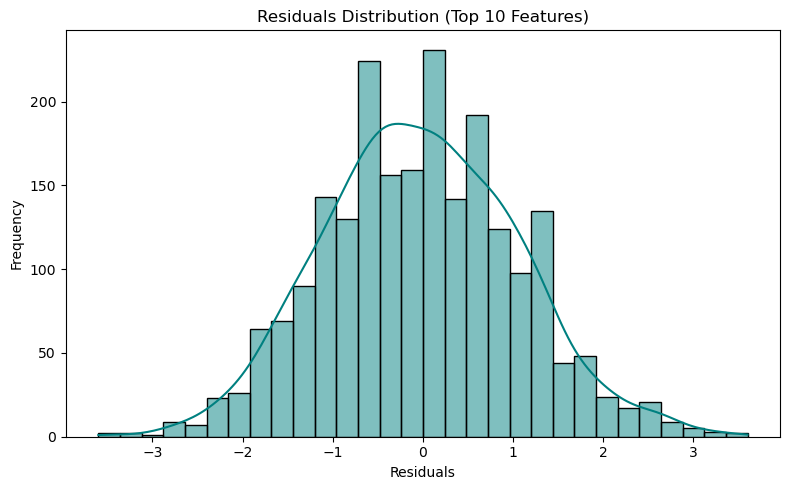

In [349]:
#4. Visualize Residuals

import matplotlib.pyplot as plt
import seaborn as sns

residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=30, kde=True, color='teal')
plt.title("Residuals Distribution (Top 10 Features)")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [351]:
#5. Bin Predictions into Anxiety Classes

X_test_copy = X_test_top10.copy()
X_test_copy["Anxiety_Pred"] = y_pred

# Binning predictions into categories (adjust bin edges if needed)
X_test_copy["Anxiety_Class"] = pd.cut(
    y_pred,
    bins=[-np.inf, 3.33, 6.66, np.inf],
    labels=["Low", "Moderate", "High"]
)

# Display class distribution
print("Predicted Anxiety Class Distribution:\n", X_test_copy["Anxiety_Class"].value_counts())

Predicted Anxiety Class Distribution:
 Anxiety_Class
Low         1530
Moderate     461
High         209
Name: count, dtype: int64


C:\Users\npdan\AppData\Local\Temp\ipykernel_1976\3934383215.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df.head(10), x='Importance', y='Feature', palette='viridis')


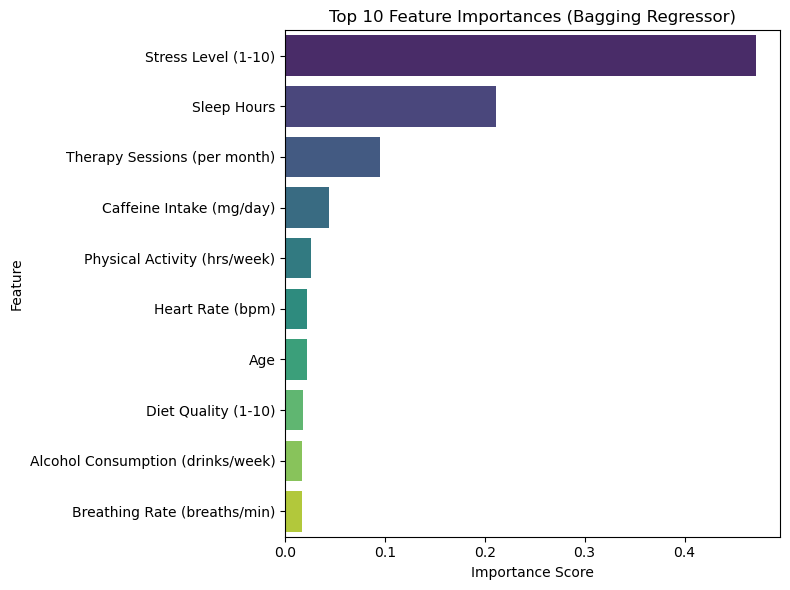

In [353]:
#6. Visualize Top 10 Feature Importances

plt.figure(figsize=(8, 6))
sns.barplot(data=importance_df.head(10), x='Importance', y='Feature', palette='viridis')
plt.title("Top 10 Feature Importances (Bagging Regressor)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [355]:
#1. Add the predictions to my test set

X_test_copy = X_test.copy()
X_test_copy["Anxiety_Pred"] = y_pred
X_test_copy["Anxiety_Class"] = pd.cut(y_pred,
    bins=[0, 1, 2, 3],
    labels=["Low", "Moderate", "High"]
)

In [357]:
#2. Check feature means by class

X_test_copy.groupby("Anxiety_Class")[X_test.columns].mean().T.sort_values("High", ascending=False).head(10)

C:\Users\npdan\AppData\Local\Temp\ipykernel_1976\3173241148.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  X_test_copy.groupby("Anxiety_Class")[X_test.columns].mean().T.sort_values("High", ascending=False).head(10)


Anxiety_Class,Low,Moderate,High
Caffeine Intake (mg/day),216.618026,259.673358,264.813356
Heart Rate (bpm),88.733906,88.704380,89.385274
Age,38.523605,40.846715,41.147260
Breathing Rate (breaths/min),21.103004,20.529197,20.183219
Alcohol Consumption (drinks/week),9.038627,9.244526,9.273973
Sleep Hours,7.315021,6.988686,6.849829
Stress Level (1-10),1.755365,3.421533,5.875000
Diet Quality (1-10),5.811159,5.339416,5.426370
Physical Activity (hrs/week),3.083262,3.139964,3.261301
Sweating Level (1-5),3.068670,3.063869,3.065068


In [322]:
#Predict with LGBMRegressor

from lightgbm import LGBMRegressor

#1. Select and Keep the Top 10 Features

# Average feature importances across all base estimators
importances = np.mean(
    [tree.feature_importances_ for tree in lgbm.estimators_],
    axis=0
)

# Match importances to feature names
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Select top 10
top_10_features = importance_df.head(10)['Feature'].tolist()
print("Top 10 features:", top_10_features)

# Filter datasets
X_train_top10 = X_train[top_10_features]
X_test_top10 = X_test[top_10_features]

AttributeError: 'LGBMRegressor' object has no attribute 'estimators_'

In [324]:
#2. Retrain LGBMRegressor on Top 10 Features

from lightgbm import LGBMRegressor

lgbm_top10 = LGBMRegressor(random_state=42)
lgbm_top10.fit(X_train_top10, y_train)
y_pred = lgbm_top10.predict(X_test_top10)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000566 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 605
[LightGBM] [Info] Number of data points in the train set: 8800, number of used features: 10
[LightGBM] [Info] Start training from score 2.924659


In [326]:
#3. Evaluate Model

from sklearn.metrics import mean_squared_error, r2_score

rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"R2 Score: {r2:.4f}")

RMSE: 1.0124
R2 Score: 0.7788


C:\Users\npdan\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


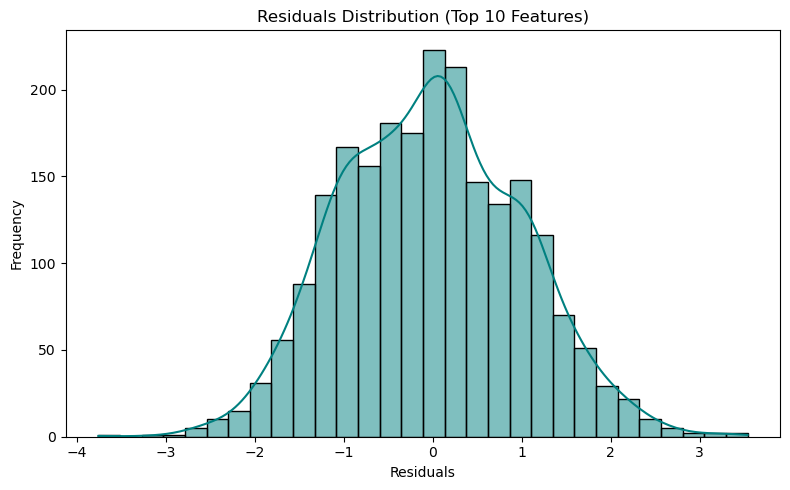

In [328]:
#4. Visualize Residuals

residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=30, kde=True, color='teal')
plt.title("Residuals Distribution (Top 10 Features)")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [330]:
#5. Bin Predictions into Anxiety Classes

X_test_copy = X_test_top10.copy()
X_test_copy["Anxiety_Pred"] = y_pred

# Binning predictions into categories (adjust bin edges if needed)
X_test_copy["Anxiety_Class"] = pd.cut(
    y_pred,
    bins=[-np.inf, 3.33, 6.66, np.inf],
    labels=["Low", "Moderate", "High"]
)

# Display class distribution
print("Predicted Anxiety Class Distribution:\n", X_test_copy["Anxiety_Class"].value_counts())

Predicted Anxiety Class Distribution:
 Anxiety_Class
Low         1510
Moderate     478
High         212
Name: count, dtype: int64


C:\Users\npdan\AppData\Local\Temp\ipykernel_1976\2844724275.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df.head(10), x='Importance', y='Feature', palette='viridis')


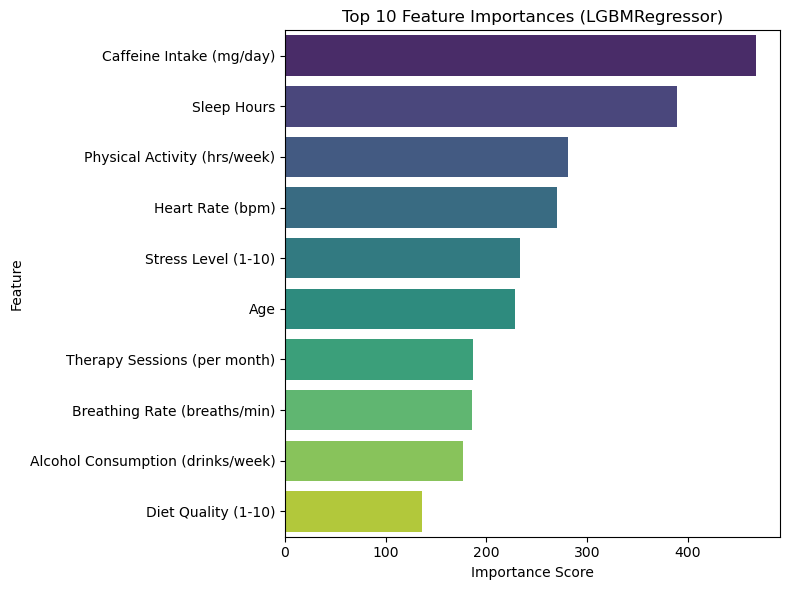

In [332]:
#6. Visualize Top 10 Feature Importances

plt.figure(figsize=(8, 6))
sns.barplot(data=importance_df.head(10), x='Importance', y='Feature', palette='viridis')
plt.title("Top 10 Feature Importances (LGBMRegressor)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()